In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon
from matplotlib import pyplot as plt

In [127]:
b_coarse_test = pd.read_csv('baseline_coarse/test_output.csv')
b_coarse_validate = pd.read_csv('baseline_coarse/validate_output.csv')
b_fine_test = pd.read_csv('baseline_fine/test_output.csv')
b_fine_validate = pd.read_csv('baseline_fine/validate_output.csv')

In [128]:
b_coarse_test.head()

,audio_filename,1-1_small-sounding-engine,1-2_medium-sounding-engine,1-3_large-sounding-engine,1-X_engine-of-uncertain-size,2-1_rock-drill,2-2_jackhammer,2-3_hoe-ram,2-4_pile-driver,2-X_other-unknown-impact-machinery,...,7-X_other-unknown-human-voice,8-1_dog-barking-whining,1_engine,2_machinery-impact,3_non-machinery-impact,4_powered-saw,5_alert-signal,6_music,7_human-voice,8_dog
0,00_026884.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.889729,0.094852,0.086133,0.027290,0.233800,0.006358,0.199227,0.007872
1,00_026919.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.957314,0.199082,0.027140,0.122977,0.142969,0.019632,0.372051,0.007366
2,00_027065.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.960015,0.064734,0.038756,0.083843,0.077294,0.014727,0.198511,0.004997
3,00_027096.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.578963,0.198147,0.206318,0.025250,0.067871,0.003536,0.066235,0.004860
4,00_027130.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.484228,0.004531,0.003733,0.002870,0.998977,0.010798,0.269619,0.005160


In [129]:
b_coarse_validate.head()

,audio_filename,1-1_small-sounding-engine,1-2_medium-sounding-engine,1-3_large-sounding-engine,1-X_engine-of-uncertain-size,2-1_rock-drill,2-2_jackhammer,2-3_hoe-ram,2-4_pile-driver,2-X_other-unknown-impact-machinery,...,7-X_other-unknown-human-voice,8-1_dog-barking-whining,1_engine,2_machinery-impact,3_non-machinery-impact,4_powered-saw,5_alert-signal,6_music,7_human-voice,8_dog
0,00_000066.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.975219,0.144430,0.200107,0.019665,0.196976,0.027058,0.100367,0.004267
1,00_000118.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.644556,0.061890,0.034375,0.036397,0.149655,0.024858,0.573880,0.005785
2,00_000275.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.840166,0.198937,0.160922,0.073350,0.176219,0.011209,0.153750,0.074628
3,00_000277.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.235527,0.014608,0.008548,0.003796,0.963205,0.004651,0.177402,0.003434
4,00_000357.wav,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.952305,0.057798,0.084253,0.008471,0.106315,0.015915,0.364513,0.004014


In [130]:
b_fine_test.head()

,audio_filename,1-1_small-sounding-engine,1-2_medium-sounding-engine,1-3_large-sounding-engine,1-X_engine-of-uncertain-size,2-1_rock-drill,2-2_jackhammer,2-3_hoe-ram,2-4_pile-driver,2-X_other-unknown-impact-machinery,...,7-X_other-unknown-human-voice,8-1_dog-barking-whining,1_engine,2_machinery-impact,3_non-machinery-impact,4_powered-saw,5_alert-signal,6_music,7_human-voice,8_dog
0,00_026884.wav,0.068738,0.437022,0.564084,0.0,0.002635,0.001863,0.000679,0.002047,0.0,...,0.0,0.002913,0.564084,0.002635,0.050625,0.002232,0.245048,0.003786,0.138264,0.002913
1,00_026919.wav,0.135098,0.585180,0.755758,0.0,0.050243,0.016379,0.005760,0.006360,0.0,...,0.0,0.001299,0.755758,0.050243,0.022773,0.032604,0.026917,0.004650,0.374211,0.001299
2,00_027065.wav,0.079016,0.720873,0.518440,0.0,0.003899,0.001219,0.000514,0.001209,0.0,...,0.0,0.000666,0.720873,0.003899,0.051248,0.003857,0.040986,0.002473,0.043064,0.000666
3,00_027096.wav,0.109124,0.181155,0.096373,0.0,0.025406,0.029478,0.012179,0.018190,0.0,...,0.0,0.001925,0.181155,0.029478,0.170790,0.004142,0.025173,0.002054,0.009363,0.001925
4,00_027130.wav,0.007309,0.252969,0.062753,0.0,0.004612,0.000630,0.000007,0.001935,0.0,...,0.0,0.020365,0.252969,0.004612,0.006633,0.000216,0.967746,0.003558,0.286435,0.020365


In [131]:
b_fine_validate.head()

,audio_filename,1-1_small-sounding-engine,1-2_medium-sounding-engine,1-3_large-sounding-engine,1-X_engine-of-uncertain-size,2-1_rock-drill,2-2_jackhammer,2-3_hoe-ram,2-4_pile-driver,2-X_other-unknown-impact-machinery,...,7-X_other-unknown-human-voice,8-1_dog-barking-whining,1_engine,2_machinery-impact,3_non-machinery-impact,4_powered-saw,5_alert-signal,6_music,7_human-voice,8_dog
0,00_000066.wav,0.051666,0.441040,0.723131,0.0,0.007765,0.113608,0.005137,0.003808,0.0,...,0.0,0.004320,0.723131,0.113608,0.183856,0.002897,0.029183,0.012105,0.017456,0.004320
1,00_000118.wav,0.181276,0.408930,0.192278,0.0,0.010604,0.003491,0.000459,0.001134,0.0,...,0.0,0.000509,0.408930,0.010604,0.033441,0.031556,0.015971,0.010113,0.663332,0.000509
2,00_000275.wav,0.119311,0.470611,0.653181,0.0,0.046424,0.009104,0.001650,0.010535,0.0,...,0.0,0.033810,0.653181,0.046424,0.152164,0.052989,0.014816,0.012553,0.151933,0.033810
3,00_000277.wav,0.037070,0.159284,0.027592,0.0,0.004121,0.000476,0.000120,0.001983,0.0,...,0.0,0.001197,0.159284,0.004121,0.003699,0.000384,0.912674,0.006277,0.123240,0.001197
4,00_000357.wav,0.105320,0.657290,0.083541,0.0,0.001580,0.000853,0.000879,0.003718,0.0,...,0.0,0.000347,0.657290,0.003718,0.069407,0.002019,0.010202,0.008599,0.090300,0.000347


In [132]:
annot = pd.read_csv('annotations.csv')

In [133]:
annot.head()

,split,sensor_id,audio_filename,annotator_id,borough,block,latitude,longitude,year,week,...,7-X_other-unknown-human-voice_proximity,8-1_dog-barking-whining_proximity,1_engine_presence,2_machinery-impact_presence,3_non-machinery-impact_presence,4_powered-saw_presence,5_alert-signal_presence,6_music_presence,7_human-voice_presence,8_dog_presence
0,test,0,00_026884.wav,-6,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,1,0,-1,-1,-1,-1,-1
1,test,0,00_026884.wav,-4,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
2,test,0,00_026884.wav,-3,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,-1,-1,-1,-1,-1,-1,-1
3,test,0,00_026884.wav,-1,1,547,40.72951,-73.99388,2019,43,...,-1,-1,-1,0,0,-1,-1,-1,-1,-1
4,test,0,00_026884.wav,0,1,547,40.72951,-73.99388,2019,43,...,-1,-1,1,0,1,0,0,0,0,0


In [134]:
df = b_coarse_test.drop('audio_filename', axis = 1).idxmax(axis=1)

In [135]:
coarse_test_df = pd.DataFrame({'audio_filename': b_coarse_test.iloc[:,0],'target':df})

In [136]:
coarse_test_df

,audio_filename,target
0,00_026884.wav,1_engine
1,00_026919.wav,1_engine
2,00_027065.wav,1_engine
3,00_027096.wav,1_engine
4,00_027130.wav,5_alert-signal
...,...,...
659,58_027562.wav,1_engine
660,61_027412.wav,1_engine
661,61_027621.wav,3_non-machinery-impact
662,61_027651.wav,1_engine


In [137]:
df

0                    1_engine
1                    1_engine
2                    1_engine
3                    1_engine
4              5_alert-signal
                ...          
659                  1_engine
660                  1_engine
661    3_non-machinery-impact
662                  1_engine
663                  1_engine
Length: 664, dtype: object

In [138]:
df = b_fine_test.drop('audio_filename', axis = 1).idxmax(axis=1)

In [139]:
fine_test_df = pd.DataFrame({'audio_filename': b_fine_test.iloc[:,0],'target':df})

In [140]:
fine_test_df

,audio_filename,target
0,00_026884.wav,1-3_large-sounding-engine
1,00_026919.wav,1-3_large-sounding-engine
2,00_027065.wav,1-2_medium-sounding-engine
3,00_027096.wav,1-2_medium-sounding-engine
4,00_027130.wav,5-3_siren
...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking
660,61_027412.wav,1-1_small-sounding-engine
661,61_027621.wav,3-1_non-machinery-impact
662,61_027651.wav,1-2_medium-sounding-engine


In [141]:
df=annot.drop(['split','sensor_id','audio_filename','annotator_id','borough','block','latitude','longitude','year','week','day',
'hour','1-1_small-sounding-engine_proximity','1-2_medium-sounding-engine_proximity','1-3_large-sounding-engine_proximity',
'1-X_engine-of-uncertain-size_proximity','2-1_rock-drill_proximity','2-2_jackhammer_proximity',
'2-3_hoe-ram_proximity','2-4_pile-driver_proximity','2-X_other-unknown-impact-machinery_proximity',
'3-1_non-machinery-impact_proximity','4-1_chainsaw_proximity','4-2_small-medium-rotating-saw_proximity',
'4-3_large-rotating-saw_proximity','4-X_other-unknown-powered-saw_proximity','5-1_car-horn_proximity',
'5-2_car-alarm_proximity','5-3_siren_proximity','5-4_reverse-beeper_proximity','5-X_other-unknown-alert-signal_proximity',
'6-1_stationary-music_proximity','6-2_mobile-music_proximity','6-3_ice-cream-truck_proximity','6-X_music-from-uncertain-source_proximity',
'7-1_person-or-small-group-talking_proximity','7-2_person-or-small-group-shouting_proximity','7-3_large-crowd_proximity',
'7-4_amplified-speech_proximity','7-X_other-unknown-human-voice_proximity','8-1_dog-barking-whining_proximity'
],axis=1).idxmax(axis=1)

In [142]:
annot_df = pd.DataFrame({'audio_filename': annot['audio_filename'],'day':annot['day'],'hour':annot['hour'], 'block': annot['block'], 'longitude': annot['longitude'], 'latitude': annot['latitude'], 'target': df})

In [143]:
annot_df.head()

,audio_filename,day,hour,block,longitude,latitude,target
0,00_026884.wav,4,8,547,-73.99388,40.72951,2-X_other-unknown-impact-machinery_presence
1,00_026884.wav,4,8,547,-73.99388,40.72951,1-3_large-sounding-engine_presence
2,00_026884.wav,4,8,547,-73.99388,40.72951,1-2_medium-sounding-engine_presence
3,00_026884.wav,4,8,547,-73.99388,40.72951,2-1_rock-drill_presence
4,00_026884.wav,4,8,547,-73.99388,40.72951,1-2_medium-sounding-engine_presence


In [144]:
group_df1=annot_df.groupby(['audio_filename','day','hour', 'block', 'longitude', 'latitude', 'target'],sort=False).size().groupby(level=0).idxmax().apply(lambda x:x[6]).reset_index(name='target')
#annot_df.groupby(['audio_filename','target'],sort=False).size().groupby(level=0).idxmax().apply(lambda x:x[1]).reset_index(name='target')

In [145]:
group_df1

,audio_filename,target
0,00_000066.wav,1-1_small-sounding-engine_presence
1,00_000071.wav,1-3_large-sounding-engine_presence
2,00_000085.wav,1-1_small-sounding-engine_presence
3,00_000118.wav,1-2_medium-sounding-engine_presence
4,00_000179.wav,4-2_small-medium-rotating-saw_presence
...,...,...
18505,58_027562.wav,7-2_person-or-small-group-shouting_presence
18506,61_027412.wav,2-1_rock-drill_presence
18507,61_027621.wav,1-1_small-sounding-engine_presence
18508,61_027651.wav,1-2_medium-sounding-engine_presence


In [146]:
annot_df

,audio_filename,day,hour,block,longitude,latitude,target
0,00_026884.wav,4,8,547,-73.99388,40.72951,2-X_other-unknown-impact-machinery_presence
1,00_026884.wav,4,8,547,-73.99388,40.72951,1-3_large-sounding-engine_presence
2,00_026884.wav,4,8,547,-73.99388,40.72951,1-2_medium-sounding-engine_presence
3,00_026884.wav,4,8,547,-73.99388,40.72951,2-1_rock-drill_presence
4,00_026884.wav,4,8,547,-73.99388,40.72951,1-2_medium-sounding-engine_presence
...,...,...,...,...,...,...,...
62017,46_020807.wav,5,19,559,-73.98879,40.73365,5-1_car-horn_presence
62018,46_020807.wav,5,19,559,-73.98879,40.73365,5-1_car-horn_presence
62019,46_020853.wav,2,9,559,-73.98879,40.73365,7-X_other-unknown-human-voice_presence
62020,46_020853.wav,2,9,559,-73.98879,40.73365,1-1_small-sounding-engine_presence


In [147]:
group_df1

,audio_filename,target
0,00_000066.wav,1-1_small-sounding-engine_presence
1,00_000071.wav,1-3_large-sounding-engine_presence
2,00_000085.wav,1-1_small-sounding-engine_presence
3,00_000118.wav,1-2_medium-sounding-engine_presence
4,00_000179.wav,4-2_small-medium-rotating-saw_presence
...,...,...
18505,58_027562.wav,7-2_person-or-small-group-shouting_presence
18506,61_027412.wav,2-1_rock-drill_presence
18507,61_027621.wav,1-1_small-sounding-engine_presence
18508,61_027651.wav,1-2_medium-sounding-engine_presence


In [148]:
fine_mismatch_df=pd.DataFrame({'audio_filename':fine_test_df['audio_filename'],'predictions':fine_test_df['target'],
'ground_truth':[group_df1.loc[group_df1['audio_filename']==rows['audio_filename'],
'target'].iloc[0] for index,rows in fine_test_df.iterrows()],'day':[annot_df.loc[annot['audio_filename']==rows['audio_filename'],
'day'].iloc[1] for index,rows in fine_test_df.iterrows()],'hour':[annot_df.loc[annot['audio_filename']==rows['audio_filename'],
'hour'].iloc[2] for index,rows in fine_test_df.iterrows()], 'block':[annot_df.loc[annot['audio_filename'] == rows['audio_filename'], 
'block'].iloc[3] for index,rows in fine_test_df.iterrows()], 'latitude':[annot_df.loc[annot['audio_filename'] == rows['audio_filename'], 
'latitude'].iloc[-1] for index,rows in fine_test_df.iterrows()], 'longitude':[annot_df.loc[annot['audio_filename'] == rows['audio_filename'], 
'longitude'].iloc[-2] for index,rows in fine_test_df.iterrows()]})

In [149]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine_presence,4,8,547,40.72951,-73.99388
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine_presence,1,20,547,40.72951,-73.99388
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine_presence,6,11,547,40.72951,-73.99388
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact_presence,1,9,547,40.72951,-73.99388
4,00_027130.wav,5-3_siren,5-3_siren_presence,0,13,547,40.72951,-73.99388
...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting_presence,5,16,2015,40.68157,-73.95918
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill_presence,1,8,565,40.67767,-74.01292
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine_presence,6,19,565,40.67767,-74.01292
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine_presence,6,20,565,40.67767,-74.01292


In [150]:
fine_mismatch_df['ground_truth']=fine_mismatch_df['ground_truth'].map(lambda x:'_'.join(x.split('_')[:-1]))

In [151]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388
...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,20,565,40.67767,-74.01292


In [108]:
fine_mismatch_dff = fine_mismatch_df.copy()

In [109]:
fine_mismatch_dff

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388
...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,20,565,40.67767,-74.01292


In [152]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388
...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,20,565,40.67767,-74.01292


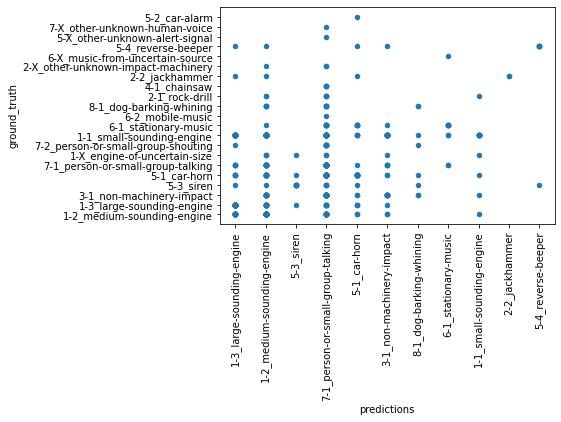

In [153]:
fine_mismatch_df.plot(x="predictions", y="ground_truth",kind="scatter")
plt.xticks(rotation=90)
plt.show()

In [154]:
fine_mismatch_df['Equals'] = np.where(fine_mismatch_df['predictions'] == fine_mismatch_df['ground_truth'], '1', '0')


In [155]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388,0
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388,1
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388,1
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388,0
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388,1
...,...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918,0
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292,0
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292,0
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,20,565,40.67767,-74.01292,1


In [156]:
fine_mismatch_dff = fine_mismatch_df.copy()

In [157]:
dict1={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
fine_mismatch_df['day']=fine_mismatch_df['day'].apply(lambda x:dict1[x])

In [158]:
fine_mismatch_dff

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388,0
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388,1
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388,1
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388,0
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388,1
...,...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918,0
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292,0
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292,0
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,20,565,40.67767,-74.01292,1


In [159]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,Thursday,8,547,40.72951,-73.99388,0
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,Monday,20,547,40.72951,-73.99388,1
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,Saturday,11,547,40.72951,-73.99388,1
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,Monday,9,547,40.72951,-73.99388,0
4,00_027130.wav,5-3_siren,5-3_siren,Sunday,13,547,40.72951,-73.99388,1
...,...,...,...,...,...,...,...,...,...
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,Friday,16,2015,40.68157,-73.95918,0
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,Monday,8,565,40.67767,-74.01292,0
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,Saturday,19,565,40.67767,-74.01292,0
662,61_027651.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,Saturday,20,565,40.67767,-74.01292,1


C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


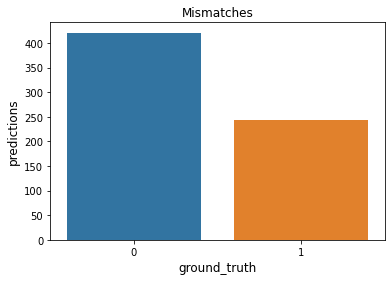

In [160]:
count = fine_mismatch_df['Equals'].value_counts()
sns.barplot(count.index, count.values)
plt.title("Mismatches")
plt.xlabel("ground_truth", fontsize = 12)
plt.ylabel("predictions", fontsize = 12)
plt.show()

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Mismatches')

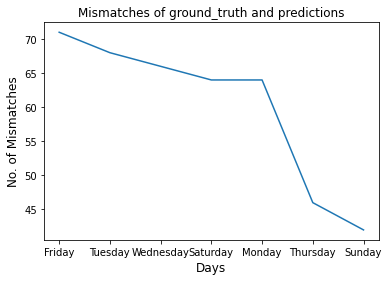

In [161]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='0']['day'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Mismatches of ground_truth and predictions')
plt.xlabel('Days',fontsize=12)
plt.ylabel('No. of Mismatches',fontsize=12)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Matches')

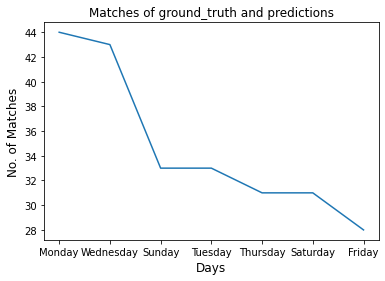

In [162]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='1']['day'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Matches of ground_truth and predictions')
plt.xlabel('Days',fontsize=12)
plt.ylabel('No. of Matches',fontsize=12)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Mismatches')

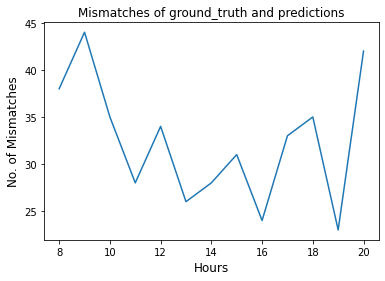

In [163]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='0']['hour'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Mismatches of ground_truth and predictions')
plt.xlabel('Hours',fontsize=12)
plt.ylabel('No. of Mismatches',fontsize=12)

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'No. of Matches')

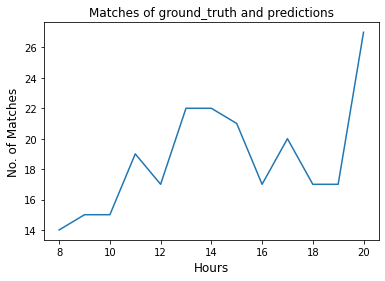

In [164]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='1']['hour'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Matches of ground_truth and predictions')
plt.xlabel('Hours',fontsize=12)
plt.ylabel('No. of Matches',fontsize=12)

In [165]:
fine_mismatch_df0 = fine_mismatch_dff.loc[(fine_mismatch_df["Equals"] == "0")]# & (data["TMP"] > 7.2), ["DTM","TMP"]]

In [166]:
fine_mismatch_df1 = fine_mismatch_dff.loc[(fine_mismatch_df["Equals"] == "1")]

In [167]:
fine_mismatch_df0

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,4,8,547,40.72951,-73.99388,0
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,1,9,547,40.72951,-73.99388,0
5,00_027176.wav,7-1_person-or-small-group-talking,5-1_car-horn,5,15,547,40.72951,-73.99388,0
6,00_027218.wav,7-1_person-or-small-group-talking,5-1_car-horn,6,18,547,40.72951,-73.99388,0
8,00_027302.wav,7-1_person-or-small-group-talking,1-X_engine-of-uncertain-size,0,19,547,40.72951,-73.99388,0
...,...,...,...,...,...,...,...,...,...
658,58_027515.wav,7-1_person-or-small-group-talking,1-3_large-sounding-engine,4,15,2015,40.68157,-73.95918,0
659,58_027562.wav,7-1_person-or-small-group-talking,7-2_person-or-small-group-shouting,5,16,2015,40.68157,-73.95918,0
660,61_027412.wav,1-1_small-sounding-engine,2-1_rock-drill,1,8,565,40.67767,-74.01292,0
661,61_027621.wav,3-1_non-machinery-impact,1-1_small-sounding-engine,6,19,565,40.67767,-74.01292,0


In [168]:
fine_mismatch_df1

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,1,20,547,40.72951,-73.99388,1
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,11,547,40.72951,-73.99388,1
4,00_027130.wav,5-3_siren,5-3_siren,0,13,547,40.72951,-73.99388,1
7,00_027273.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,0,12,547,40.72951,-73.99388,1
9,00_027342.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,5,20,547,40.72951,-73.99388,1
...,...,...,...,...,...,...,...,...,...
649,56_027758.wav,5-1_car-horn,5-1_car-horn,3,14,165,40.68876,-73.98453,1
653,57_027391.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,2,15,462,40.72783,-73.98863,1
655,57_027665.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,6,8,462,40.72783,-73.98863,1
656,58_027133.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,6,17,2015,40.68157,-73.95918,1


In [179]:
corelations_mismatch = fine_mismatch_df0.corr()
#fine_mismatch_df0.corr().iloc[3:7, -1]

In [181]:
print(fine_mismatch_df0.corr())

                day      hour     block  latitude  longitude
day        1.000000 -0.083070  0.013745  0.009868  -0.005129
hour      -0.083070  1.000000 -0.107163 -0.078518  -0.048034
block      0.013745 -0.107163  1.000000  0.327004   0.544162
latitude   0.009868 -0.078518  0.327004  1.000000   0.169889
longitude -0.005129 -0.048034  0.544162  0.169889   1.000000


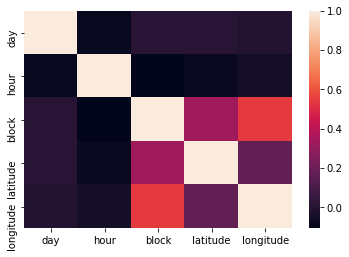

In [180]:
sns.heatmap(corelations_mismatch)
plt.show()

In [182]:
corelations_match = fine_mismatch_df1.corr()
#fine_mismatch_df0.corr().iloc[3:7, -1]

In [183]:
print(fine_mismatch_df1.corr())

                day      hour     block  latitude  longitude
day        1.000000  0.182463  0.011668 -0.018088  -0.028868
hour       0.182463  1.000000  0.051728  0.005761   0.086893
block      0.011668  0.051728  1.000000  0.417982   0.719548
latitude  -0.018088  0.005761  0.417982  1.000000   0.248096
longitude -0.028868  0.086893  0.719548  0.248096   1.000000


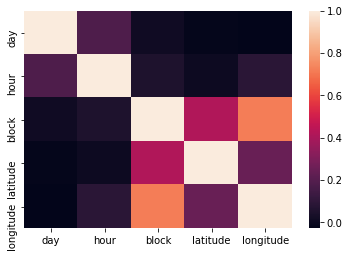

In [184]:
sns.heatmap(corelations_match)
plt.show()

In [185]:
corelation = fine_mismatch_dff.corr()
#fine_mismatch_df0.corr().iloc[3:7, -1]

In [186]:
print(fine_mismatch_dff.corr())

                day      hour     block  latitude  longitude
day        1.000000  0.004314  0.005535 -0.006894  -0.024956
hour       0.004314  1.000000 -0.035491 -0.042176   0.025717
block      0.005535 -0.035491  1.000000  0.368033   0.636323
latitude  -0.006894 -0.042176  0.368033  1.000000   0.208867
longitude -0.024956  0.025717  0.636323  0.208867   1.000000


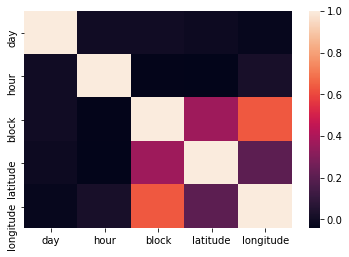

In [188]:
sns.heatmap(corelation)
plt.show()

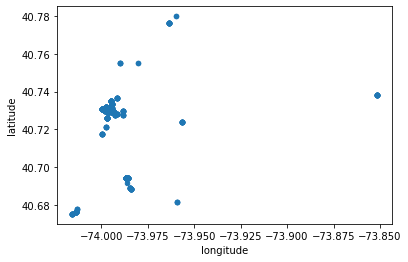

In [201]:
# import matplotlib.pyplot as plt
# plt.scatter(x=fine_mismatch_df['longitude'], y=fine_mismatch_df['latitude'])
# plt.show()
import matplotlib.pyplot as plt
fine_mismatch_df.plot(kind="scatter", x="longitude", y="latitude", alpha=1)
plt.show()

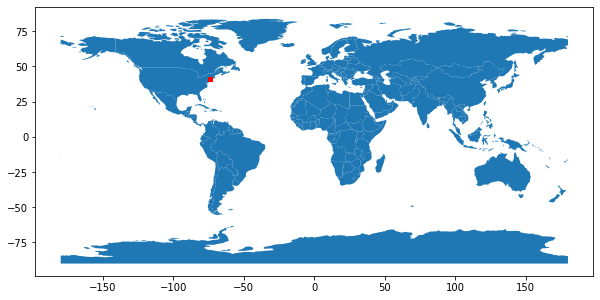

In [239]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

#df = pd.read_csv("Long_Lats.csv", delimiter=',', skiprows=0, low_memory=False)

geometry = [Point(xy) for xy in zip(fine_mismatch_df['longitude'], fine_mismatch_df['latitude'])]
gdf = GeoDataFrame(fine_mismatch_df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(10, 10)), marker='o', color='red', markersize=15);

In [240]:
street_map = gpd.read_file('tl/tl_2016_36_cousub.shp')

<AxesSubplot:>

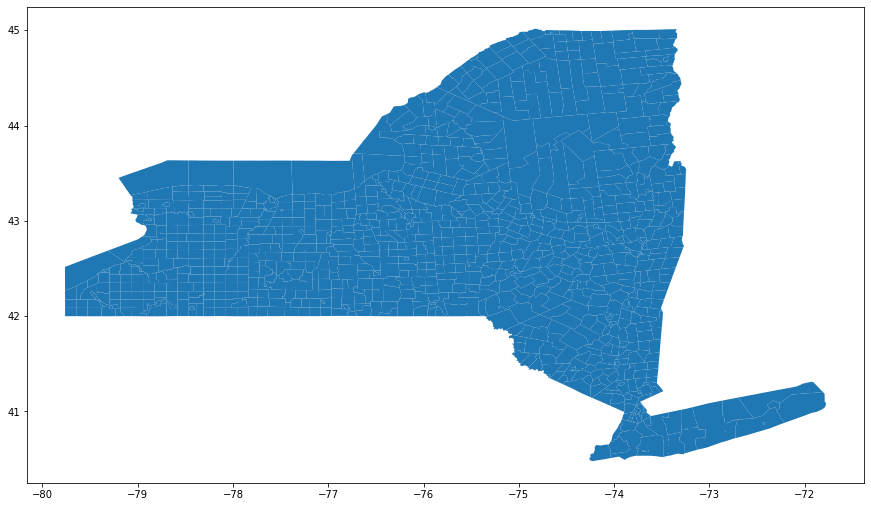

In [241]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax)

In [233]:
geometry = [Point(xy) for xy in zip(fine_mismatch_df["longitude"], fine_mismatch_df["latitude"])]
crs = {'init': 'epsg:4326'} 
geometry[:3]

In [ ]:
from osgeo import gdal
import geopandas as gpd

# e.g. srtm.tif coordinates epsg:4326
dataset = gdal.Open()

# path to where you want the clipped raster
outputSrtm = "srtm.tif"

# e.g. shapefile.shp coordinates epsg:4326
minx, miny, maxx, maxy = gpd.read_file("tl_2016_36_cousub.shp").unary_union.bounds

ds = gdal.Translate(outputSrtm , dataset, 
                    projWin = [-75, -73,
                               39, 41]) # OR [ulx, uly, lrx, lry]
# ds = None

In [234]:
geo_df = gpd.GeoDataFrame(fine_mismatch_df, crs = crs,geometry = geometry)
geo_df.head(100)

,audio_filename,predictions,ground_truth,day,hour,block,latitude,longitude,Equals,geometry
0,00_026884.wav,1-3_large-sounding-engine,1-2_medium-sounding-engine,Thursday,8,547,40.72951,-73.99388,0,POINT (-73.99388 40.72951)
1,00_026919.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,Monday,20,547,40.72951,-73.99388,1,POINT (-73.99388 40.72951)
2,00_027065.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,Saturday,11,547,40.72951,-73.99388,1,POINT (-73.99388 40.72951)
3,00_027096.wav,1-2_medium-sounding-engine,3-1_non-machinery-impact,Monday,9,547,40.72951,-73.99388,0,POINT (-73.99388 40.72951)
4,00_027130.wav,5-3_siren,5-3_siren,Sunday,13,547,40.72951,-73.99388,1,POINT (-73.99388 40.72951)
...,...,...,...,...,...,...,...,...,...,...
95,05_027524.wav,7-1_person-or-small-group-talking,6-1_stationary-music,Wednesday,20,142,40.69398,-73.98697,0,POINT (-73.98697 40.69398)
96,05_027703.wav,5-1_car-horn,6-1_stationary-music,Monday,18,142,40.69398,-73.98697,0,POINT (-73.98697 40.69398)
97,05_027792.wav,5-1_car-horn,6-1_stationary-music,Wednesday,13,142,40.69398,-73.98697,0,POINT (-73.98697 40.69398)
98,05_027832.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,Monday,8,142,40.69398,-73.98697,1,POINT (-73.98697 40.69398)


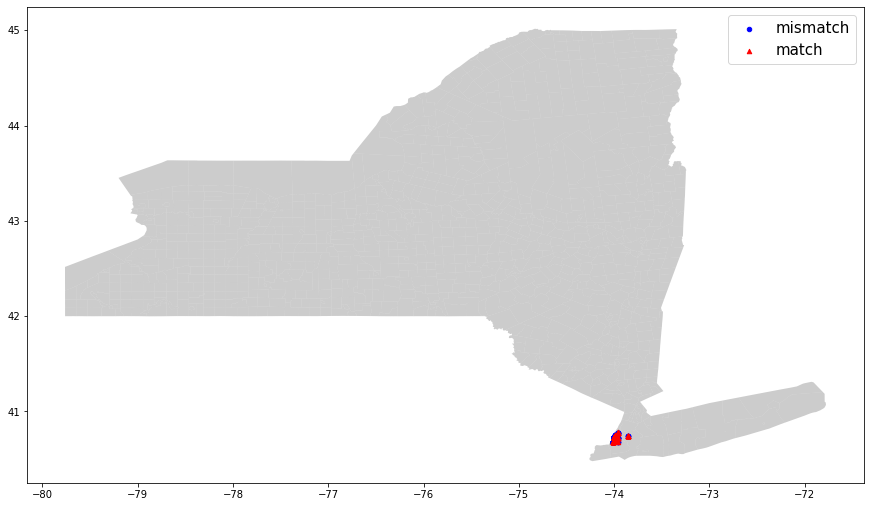

In [235]:
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df[geo_df['Equals'] == '0'].plot(ax=ax, markersize = 20, color = "blue", marker = "o", label = "mismatch")
geo_df[geo_df['Equals'] == '1'].plot(ax=ax, markersize = 20, color = "red", marker = "^", label = "match")
plt.legend(prop = {'size': 15})

In [382]:
df1 = b_coarse_validate.drop('audio_filename', axis = 1).idxmax(axis=1)
coarse_validate_df = pd.DataFrame({'audio_filename': b_coarse_validate.iloc[:,0],'target':df1})

In [383]:
coarse_validate_df

,audio_filename,target
0,00_000066.wav,1_engine
1,00_000118.wav,1_engine
2,00_000275.wav,1_engine
3,00_000277.wav,5_alert-signal
4,00_000357.wav,1_engine
...,...,...
533,46_010845.wav,7_human-voice
534,46_010846.wav,7_human-voice
535,46_010902.wav,7_human-voice
536,46_010903.wav,5_alert-signal


In [384]:
df1 = b_fine_validate.drop('audio_filename', axis = 1).idxmax(axis=1)
fine_validate_df = pd.DataFrame({'audio_filename': b_fine_validate.iloc[:,0],'target':df1})

In [385]:
fine_validate_df

,audio_filename,target
0,00_000066.wav,1-3_large-sounding-engine
1,00_000118.wav,7-1_person-or-small-group-talking
2,00_000275.wav,1-3_large-sounding-engine
3,00_000277.wav,5-3_siren
4,00_000357.wav,1-2_medium-sounding-engine
...,...,...
533,46_010845.wav,7-1_person-or-small-group-talking
534,46_010846.wav,7-1_person-or-small-group-talking
535,46_010902.wav,7-1_person-or-small-group-talking
536,46_010903.wav,5-3_siren


In [386]:
fine_mismatch_df=pd.DataFrame({'audio_filename':fine_validate_df['audio_filename'],'predictions':fine_validate_df['target'],
'ground_truth':[group_df.loc[group_df['audio_filename']==rows['audio_filename'],
'target'].iloc[0] for index,rows in fine_validate_df.iterrows()],'day':[annot_df.loc[annot['audio_filename']==rows['audio_filename'],'day'].iloc[1] for index,rows in fine_validate_df.iterrows()],'hour':[annot_df.loc[annot['audio_filename']==rows['audio_filename'],'hour'].iloc[2] for index,rows in fine_validate_df.iterrows()]})

In [387]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour
0,00_000066.wav,1-3_large-sounding-engine,1-1_small-sounding-engine_presence,2,0
1,00_000118.wav,7-1_person-or-small-group-talking,1-2_medium-sounding-engine_presence,0,21
2,00_000275.wav,1-3_large-sounding-engine,1-3_large-sounding-engine_presence,3,12
3,00_000277.wav,5-3_siren,1-2_medium-sounding-engine_presence,0,20
4,00_000357.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine_presence,0,22
...,...,...,...,...,...
533,46_010845.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking_presence,4,23
534,46_010846.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking_presence,3,22
535,46_010902.wav,7-1_person-or-small-group-talking,5-1_car-horn_presence,4,20
536,46_010903.wav,5-3_siren,5-3_siren_presence,5,22


In [388]:
fine_mismatch_df['ground_truth']=fine_mismatch_df['ground_truth'].map(lambda x:'_'.join(x.split('_')[:-1]))

In [389]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour
0,00_000066.wav,1-3_large-sounding-engine,1-1_small-sounding-engine,2,0
1,00_000118.wav,7-1_person-or-small-group-talking,1-2_medium-sounding-engine,0,21
2,00_000275.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,3,12
3,00_000277.wav,5-3_siren,1-2_medium-sounding-engine,0,20
4,00_000357.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,0,22
...,...,...,...,...,...
533,46_010845.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,4,23
534,46_010846.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,3,22
535,46_010902.wav,7-1_person-or-small-group-talking,5-1_car-horn,4,20
536,46_010903.wav,5-3_siren,5-3_siren,5,22


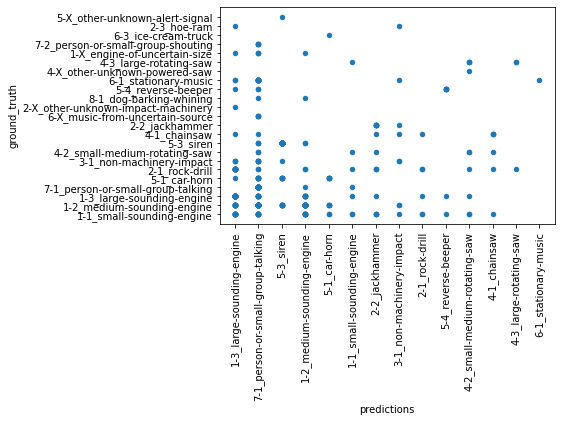

In [390]:
fine_mismatch_df.plot(x="predictions", y="ground_truth",kind="scatter")
plt.xticks(rotation=90)
plt.show()

In [391]:
fine_mismatch_df['Equals'] = np.where(fine_mismatch_df['predictions'] == fine_mismatch_df['ground_truth'], '1', '0')
dict1={0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'}
fine_mismatch_df['day']=fine_mismatch_df['day'].apply(lambda x:dict1[x])

In [392]:
fine_mismatch_df

,audio_filename,predictions,ground_truth,day,hour,Equals
0,00_000066.wav,1-3_large-sounding-engine,1-1_small-sounding-engine,Tuesday,0,0
1,00_000118.wav,7-1_person-or-small-group-talking,1-2_medium-sounding-engine,Sunday,21,0
2,00_000275.wav,1-3_large-sounding-engine,1-3_large-sounding-engine,Wednesday,12,1
3,00_000277.wav,5-3_siren,1-2_medium-sounding-engine,Sunday,20,0
4,00_000357.wav,1-2_medium-sounding-engine,1-2_medium-sounding-engine,Sunday,22,1
...,...,...,...,...,...,...
533,46_010845.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,Thursday,23,1
534,46_010846.wav,7-1_person-or-small-group-talking,7-1_person-or-small-group-talking,Wednesday,22,1
535,46_010902.wav,7-1_person-or-small-group-talking,5-1_car-horn,Thursday,20,0
536,46_010903.wav,5-3_siren,5-3_siren,Friday,22,1


C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


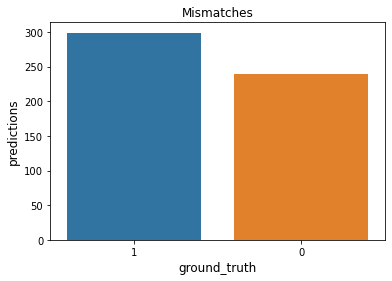

In [393]:
count = fine_mismatch_df['Equals'].value_counts()
sns.barplot(count.index, count.values)
plt.title("Mismatches")
plt.xlabel("ground_truth", fontsize = 12)
plt.ylabel("predictions", fontsize = 12)
plt.show()

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Mismatches')

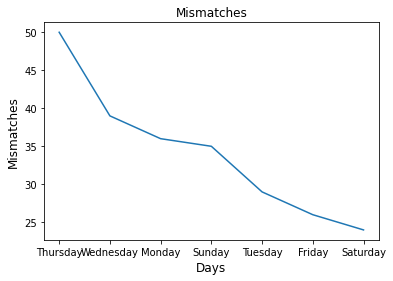

In [394]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='0']['day'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Mismatches')
plt.xlabel('Days',fontsize=12)
plt.ylabel('Mismatches',fontsize=12)

C:\Users\Ashwin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Mismatches')

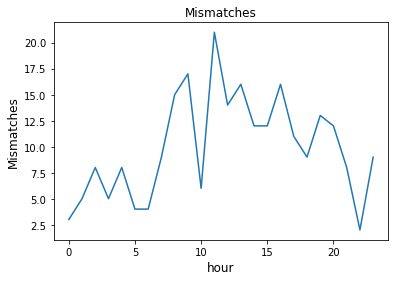

In [395]:
count=fine_mismatch_df.loc[fine_mismatch_df['Equals']=='0']['hour'].value_counts()
sns.lineplot(count.index,count.values)
plt.title('Mismatches')
plt.xlabel('hour',fontsize=12)
plt.ylabel('Mismatches',fontsize=12)